In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
dataset = pd.read_csv('valorant_match_clsfc.csv')
dataset.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,kills,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag
0,1,6,2,Placement,04/11/2023,Cypher,Ascent,Loss,5,13,8,15,4,0.5,-61,3,76,125,3
1,2,6,2,Placement,04/12/2023,Cypher,Icebox,Loss,4,13,3,15,2,0.2,-124,22,42,59,5
2,3,6,2,Placement,4/15/2023,KAY/O,Lotus,Win,13,4,7,12,7,0.6,-46,2,87,132,5
3,4,6,2,Placement,4/15/2023,Brimstone,Ascent,Loss,9,13,18,12,10,1.5,23,14,137,230,2
4,5,6,2,Placement,4/15/2023,Cypher,Haven,Loss,1,13,6,14,3,0.4,-75,7,90,146,4


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        1000 non-null   int64  
 1   episode        1000 non-null   int64  
 2   act            1000 non-null   int64  
 3   rank           1000 non-null   object 
 4   date           1000 non-null   object 
 5   agent          1000 non-null   object 
 6   map            1000 non-null   object 
 7   outcome        1000 non-null   object 
 8   round_wins     1000 non-null   int64  
 9   round_losses   1000 non-null   int64  
 10  kills          1000 non-null   int64  
 11  deaths         1000 non-null   int64  
 12  assists        1000 non-null   int64  
 13  kdr            1000 non-null   float64
 14  avg_dmg_delta  1000 non-null   int64  
 15  headshot_pct   1000 non-null   int64  
 16  avg_dmg        1000 non-null   int64  
 17  acs            1000 non-null   int64  
 18  num_frag 

In [ ]:
print("missing value :")
dataset.isnull().sum()

missing value :


,0
game_id,0
episode,0
act,0
rank,0
date,0
agent,0
map,0
outcome,0
round_wins,0
round_losses,0


In [ ]:
print("duplikat data : ")
dataset.duplicated()

duplikat data : 


,0
0,False
1,False
2,False
3,False
4,False
...,...
995,False
996,False
997,False
998,False


In [ ]:
le = LabelEncoder()

for col in dataset.columns.values:
  if dataset[col].dtype == 'object':
    dataset[col] = le.fit_transform(dataset[col])

X = dataset[['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']]
y = dataset['outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

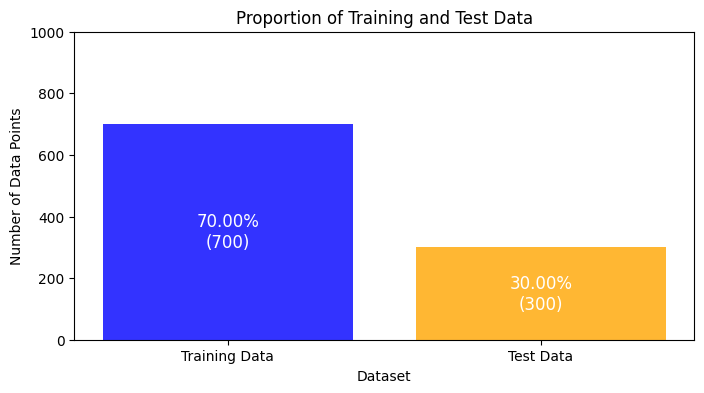

In [ ]:
data_sizes = [len(X_train), len(X_test)]
total_data = sum(data_sizes)
percentages = [size / total_data * 100 for size in data_sizes]
labels = ['Training Data', 'Test Data']

plt.figure(figsize=(8, 4))
bars = plt.bar(labels, data_sizes, color=['blue', 'orange'], alpha=0.8)
plt.title('Proportion of Training and Test Data')
plt.ylabel('Number of Data Points')
plt.xlabel('Dataset')
plt.ylim(0, 1000)

for bar, percentage, size in zip(bars, percentages, data_sizes):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f"{percentage:.2f}%\n({size})",
        ha='center', va='center', fontsize=12, color='white'
    )
plt.show()



<ipython-input-8-948dd4567855>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=ax[0], palette="pastel")
<ipython-input-8-948dd4567855>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, ax=ax[1], palette="pastel")


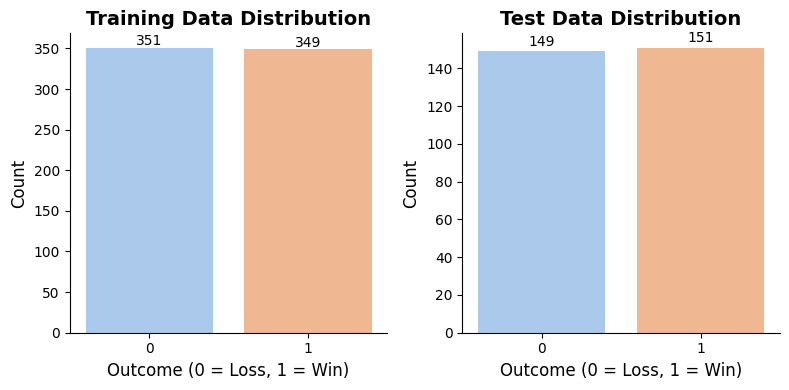

In [ ]:
def plot_data_distribution(y_train, y_test):
  fig, ax = plt.subplots(1, 2, figsize=(8, 4))

  sns.countplot(x=y_train, ax=ax[0], palette="pastel")
  ax[0].set_title("Training Data Distribution", fontsize=14, fontweight='bold')
  ax[0].set_xlabel("Outcome (0 = Loss, 1 = Win)", fontsize=12)
  ax[0].set_ylabel("Count", fontsize=12)

  for p in ax[0].patches:
    height = p.get_height()
    ax[0].text(p.get_x() + p.get_width() / 2., height + 3,
               f'{int(height)}', ha="center", fontsize=10, color="black")

  sns.countplot(x=y_test, ax=ax[1], palette="pastel")
  ax[1].set_title("Test Data Distribution", fontsize=14, fontweight='bold')
  ax[1].set_xlabel("Outcome (0 = Loss, 1 = Win)", fontsize=12)
  ax[1].set_ylabel("Count", fontsize=12)

  for p in ax[1].patches:
    height = p.get_height()
    ax[1].text(p.get_x() + p.get_width() / 2., height + 3,
               f'{int(height)}', ha="center", fontsize=10, color="black")

  sns.despine()
  plt.tight_layout()
  plt.show()

plot_data_distribution(y_train, y_test)

# Step

In [ ]:
def unit_step_func(x):
    return np.where(x > 0, 1, 0)

class PerceptronStepFunc:
    def __init__(self, learning_rate=0.01, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y > 0, 1, 0)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

In [ ]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
results = []

In [ ]:
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    p = PerceptronStepFunc(learning_rate=lr)
    p.fit(X_train.values, y_train.values)

    predictions = p.predict(X_test.values)
    accuracy = np.sum(y_test.values == predictions) / len(y_test.values)

    train_predictions = p.predict(X_train.values)
    train_accuracy = np.sum(y_train.values == train_predictions) / len(y_train.values)

    results.append({
        'learning_rate': lr,
        'test_accuracy': accuracy,
        'train_accuracy': train_accuracy
    })
    print("hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']")
    print(f"Test Accuracy: {accuracy:}")
    print(f"Training Accuracy: {train_accuracy}")


Training with Learning Rate: 0.01
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9966666666666667
Training Accuracy: 0.9985714285714286

Training with Learning Rate: 0.02
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9966666666666667
Training Accuracy: 0.9985714285714286

Training with Learning Rate: 0.03
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9966666666666667
Training Accuracy: 0.9942857142857143

Training with Learning Rate: 0.04
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9966666666666667
Training Accuracy: 0.9985714285714286

Training with Learning Rate: 0.05
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses',

# Sigmoid

In [ ]:
def sigmoid(x):
   return 1 / (1 + np.exp(-x))

class PerceptronSigmoidFunc:
    def __init__(self, learning_rate=0.01, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = sigmoid
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                error = y[idx] - y_predicted
                gradient = y_predicted * (1 - y_predicted) #sigmoid
                update = self.lr * error * gradient
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(self.activation_func(linear_output) > 0.5, 1, 0)

In [ ]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
results = []

In [ ]:
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    p = PerceptronSigmoidFunc(learning_rate=lr)
    p.fit(X_train.values, y_train.values)

    predictions = p.predict(X_test.values)
    accuracy = np.sum(y_test.values == predictions) / len(y_test.values)

    train_predictions = p.predict(X_train.values)
    train_accuracy = np.sum(y_train.values == train_predictions) / len(y_train.values)

    results.append({
        'learning_rate': lr,
        'test_accuracy': accuracy,
        'train_accuracy': train_accuracy
    })
    print("hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']")
    print(f"Test Accuracy: {accuracy}%")
    print(f"Training Accuracy: {train_accuracy}%")


Training with Learning Rate: 0.01
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9966666666666667%
Training Accuracy: 0.9971428571428571%

Training with Learning Rate: 0.02
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 1.0%
Training Accuracy: 0.9971428571428571%

Training with Learning Rate: 0.03
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 1.0%
Training Accuracy: 0.9971428571428571%

Training with Learning Rate: 0.04
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.9866666666666667%
Training Accuracy: 0.9971428571428571%

Training with Learning Rate: 0.05
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headsh

# Tanh

In [ ]:
def tanh(x):
    return np.tanh(x)

class PerceptronTanhFunc:
    def __init__(self, learning_rate=0.01, n_iters=50):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = tanh
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                error = y[idx] - y_predicted
                gradient = 1 - y_predicted**2  #tanh
                update = self.lr * error * gradient
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(self.activation_func(linear_output) > 0, 1, -1)


In [ ]:
learning_rates = [0.01, 0.02, 0.03, 0.04, 0.05]
results = []

In [ ]:
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    p = PerceptronTanhFunc(learning_rate=lr)
    p.fit(X_train.values, y_train.values)

    predictions = p.predict(X_test.values)
    accuracy = np.sum(y_test.values == predictions) / len(y_test.values)

    train_predictions = p.predict(X_train.values)
    train_accuracy = np.sum(y_train.values == train_predictions) / len(y_train.values)

    results.append({
        'learning_rate': lr,
        'test_accuracy': accuracy,
        'train_accuracy': train_accuracy
    })
    print("hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']")
    print(f"Test Accuracy: {accuracy}")
    print(f"Training Accuracy: {train_accuracy}")


Training with Learning Rate: 0.01
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.5033333333333333
Training Accuracy: 0.49857142857142855

Training with Learning Rate: 0.02
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.5033333333333333
Training Accuracy: 0.49857142857142855

Training with Learning Rate: 0.03
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.5033333333333333
Training Accuracy: 0.49857142857142855

Training with Learning Rate: 0.04
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_losses', 'round_wins', 'headshot_pct', 'num_frag']
Test Accuracy: 0.5033333333333333
Training Accuracy: 0.49857142857142855

Training with Learning Rate: 0.05
hasil akurasi dengan menggunakan kolom : ['act', 'kills', 'round_loss